In [244]:
#load the data
import pandas as pd
df=pd.read_csv(r'C:\Users\luluh\Downloads/query.csv')
df.head()

,URI,Title,RecordId,ParentType URI,From Date,To Date,Deity,Denomination,Issuer,Manufacture,...,Obverse Right Field,Reverse Right Field,Obverse Exergue,Reverse Exergue,Obverse After Legend,"Reverse Above, or Above and Below","Reverse Above, Below, or Both",Reverse Center,Reverse At Base,Date Record Modified
0,http://numismatics.org/crro/id/rrc-1.1,RRC 1/1,rrc-1.1,NaN,-326,-242,NaN,Uncertain value,Anonymous,Struck,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-22T09:49:38Z
1,http://numismatics.org/crro/id/rrc-2.1,RRC 2/1,rrc-2.1,NaN,-300,-300,NaN,Uncertain value,Anonymous,Struck,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-22T09:49:42Z
2,http://numismatics.org/crro/id/rrc-3.1,RRC 3/1,rrc-3.1,NaN,-280,-242,NaN,NaN,Anonymous,Struck,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-22T09:49:42Z
3,http://numismatics.org/crro/id/rrc-4.1,RRC 4/1,rrc-4.1,NaN,-280,-250,NaN,NaN,Anonymous,Struck,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-22T09:49:43Z
4,http://numismatics.org/crro/id/rrc-5.1,RRC 5/1,rrc-5.1,NaN,-280,-250,NaN,NaN,Anonymous,Struck,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-22T09:49:43Z


In [245]:
#select the features I want
df.columns

Index(['URI', 'Title', 'RecordId', 'ParentType URI', 'From Date', 'To Date',
       'Deity', 'Denomination', 'Issuer', 'Manufacture', 'Material', 'Mint',
       'Object Type', 'Portrait', 'Region', 'State', 'Symbol_obv',
       'Symbol_rev', 'Obverse Legend', 'Obverse Type', 'Reverse Legend',
       'Reverse Type', 'Obverse Above', 'Reverse Above', 'Obverse Below',
       'Reverse Below', 'Obverse Before', 'Reverse Before', 'Obverse Behind',
       'Reverse Behind', 'Obverse Above or Behind', 'Obverse Behind or Before',
       'Obverse Below or Behind', 'Obverse In Field', 'Reverse In Field',
       'Obverse Left Field', 'Reverse Left Field', 'Obverse Right Field',
       'Reverse Right Field', 'Obverse Exergue', 'Reverse Exergue',
       'Obverse After Legend', 'Reverse Above, or Above and Below',
       'Reverse Above, Below, or Both', 'Reverse Center', 'Reverse At Base',
       'Date Record Modified'],
      dtype='object')

In [236]:
df.shape

(2602, 47)

In [246]:
#choosing Mint as the target feature, predicting which mint the coin was made at
#keep the dataframe format
df_target=df['Mint']

In [247]:
df_features=df[['From Date','To Date','Denomination','Issuer','Manufacture','Material','Object Type','Portrait','Region']]

In [248]:
#combing two together first so that they end up having the same numbers of rows for data cleaning tasks
df_combined=pd.concat([df_features,df_target],axis=1)

In [249]:
#drop the rows that has missing(null) values
df_combined=df_combined.dropna()

In [250]:
#now rows containing missing values have been dropped, we can create features and target
df_features=df_combined.drop(columns=['Mint'])
df_target=df_combined['Mint']

In [251]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2601
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   From Date     2100 non-null   int64 
 1   To Date       2100 non-null   int64 
 2   Denomination  2100 non-null   object
 3   Issuer        2100 non-null   object
 4   Manufacture   2100 non-null   object
 5   Material      2100 non-null   object
 6   Object Type   2100 non-null   object
 7   Portrait      2100 non-null   object
 8   Region        2100 non-null   object
dtypes: int64(2), object(7)
memory usage: 164.1+ KB


In [252]:
#transform non-numerical objects to numerical using get_dummies apart from 'From Date' and 'To Date'
df_features=pd.get_dummies(df_features,columns=['Denomination','Issuer','Manufacture','Material','Object Type','Portrait','Region'])

In [253]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_target_encoded=label_encoder.fit_transform(df_target)

In [254]:
print(df_features.shape)
print(df_target_encoded.shape)

(2100, 613)
(2100,)


In [257]:
print(np.unique(df_target_encoded))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [260]:
class_names=label_encoder.classes_
print(class_names)

['Antioch, Syria' 'Apollonia, Illyria' 'Canusium' 'Corcyra'
 'Laodiceia ad Lycum' 'Luceria' 'Massalia' 'Metapontum' 'Neapolis' 'Rome'
 'Salpesa' 'Sicily 1' 'Sicily 2' 'Uncertain value']


In [262]:
#data is cleaned and ready to be trained
#will be using RandomForest to train
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [263]:
X=df_features
y=df_target_encoded

In [264]:
#test_size 0.25 meaning 25% of the datasets used in testing whereas 75% used in training. random_state=17 ensured the same split of data is used
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=17)

In [265]:
#model is an instance of class RandomForestClassifier. n_estimators means 100 tress are made and random_state=17 ensures reproducibility, meaning if I run the same code again, I'll get the same results every time.
model=RandomForestClassifier(n_estimators=100,random_state=17)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=17)

In [266]:
#using test samples to predict
y_pred=model.predict(X_test)

In [276]:
#generate the accuracy score which is number of correct predictions/total predictions
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy}')

Accuracy:0.9885714285714285


In [277]:
#refer to below cell print(df_target.columns.tolist()) for the name of each class 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00       438
          10       1.00      1.00      1.00         2
          11       0.71      0.83      0.77         6
          12       0.75      0.86      0.80         7
          13       0.98      0.95      0.96        42

    accuracy                           0.99       525
   macro avg       0.77      0.79      0.78       525
weighted avg       0.99      0.99      0.99       525



C:\Users\luluh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\luluh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\luluh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [278]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

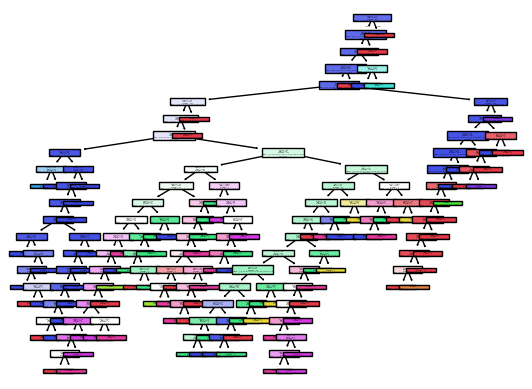

In [279]:
#only a single tree can be plotted. Thus, a variable needs to be made for this single tree first
single_tree=model.estimators_[50]
plot_tree(single_tree,filled=True)
plt.show()

In [280]:
feature_importance=model.feature_importances_

In [281]:
feature_importance_df=pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importance})
print(feature_importance_df)

                        Feature  Importance
0                     From Date    0.125638
1                       To Date    0.084799
2            Denomination_20-As    0.000613
3            Denomination_40-As    0.000004
4            Denomination_60-As    0.000439
..                          ...         ...
608              Region_Lucania    0.002062
609              Region_Phrygia    0.005210
610             Region_Sardinia    0.015750
611  Region_Seleucis and Pieria    0.000000
612               Region_Sicily    0.053194

[613 rows x 2 columns]


In [282]:
feature_importance_df=feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                           Feature  Importance
607                  Region_Latium    0.225555
0                        From Date    0.125638
1                          To Date    0.084799
596                  Region_Apulia    0.074492
612                  Region_Sicily    0.053194
..                             ...         ...
139                 Issuer_Cetegus    0.000000
40        Issuer_(Decimius) Flavus    0.000000
42   Issuer_(Iuventius) Laterensis    0.000000
7                 Denomination_Bes    0.000000
557    Portrait_Roma||Jupiter||Sol    0.000000

[613 rows x 2 columns]


In [283]:
top_features=feature_importance_df.nlargest(20,'Importance')
print(top_features)

                                        Feature  Importance
607                               Region_Latium    0.225555
0                                     From Date    0.125638
1                                       To Date    0.084799
596                               Region_Apulia    0.074492
612                               Region_Sicily    0.053194
63                             Issuer_Anonymous    0.029300
600                              Region_Etruria    0.022814
604                             Region_Hispania    0.022699
176              Issuer_KA (Republican Moneyer)    0.018028
610                             Region_Sardinia    0.015750
606                                Region_Italy    0.015488
595                               Region_Africa    0.015159
301               Issuer_P (Republican Moneyer)    0.013556
370                        Issuer_Sextus Pompey    0.011772
599                            Region_Cyrenaica    0.010055
552                     Portrait_Roma||D

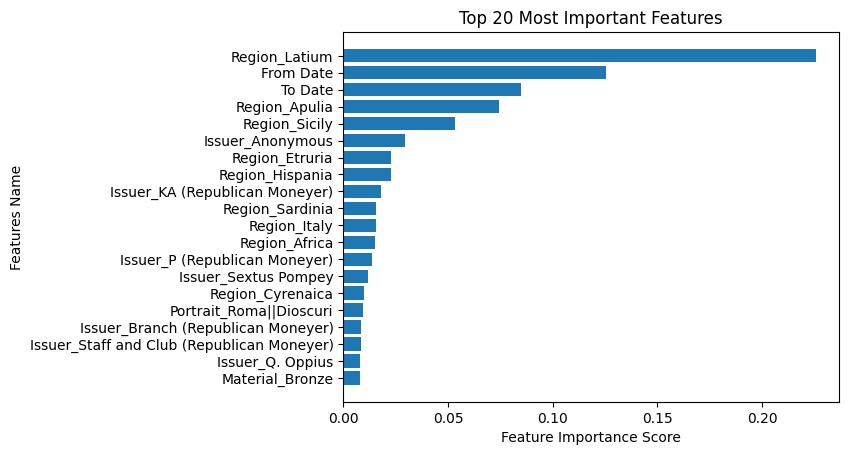

In [284]:
plt.figure()
plt.barh(top_features['Feature'],top_features['Importance'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features Name')
plt.title('Top 20 Most Important Features')
plt.gca().invert_yaxis()  # Keeps most important feature at the top
plt.show()

In [299]:
# Get the feature names used during training (this assumes you're using a model like RandomForest)
feature_names=model.feature_names_in_
type(feature_names)

numpy.ndarray

In [294]:
# Example of new data for prediction
new_data = pd.DataFrame({'From Date':[-31],'To Date':[-266],'Region_Latium':[1]})
print(new_data)

   From Date  To Date  Region_Latium
0        -31     -266              1


In [301]:
# Add missing features to new_data with default values (e.g., 0)
for feature in feature_names:
    if feature not in new_data.columns:
        new_data[feature] = 0  # You can use np.nan if needed instead of 0

# Re-order the columns of new_data to match the order in feature_names
new_data = new_data[feature_names]

# Use the trained model to predict the mint
predicted_mint = model.predict(new_data)

# If the target is label encoded, convert the numerical prediction to the original class name
predicted_class = label_encoder.inverse_transform(predicted_mint)

print(f'Predicted_Mint Index:{predicted_mint}')
print(f"Predicted Mint: {predicted_class[0]}")

Predicted_Mint Index:[9]
Predicted Mint: Rome
